<a href="https://colab.research.google.com/github/SLIIT-FacultyOfComputing/assignment01-HansakaDilshanJayawardana/blob/main/IT19972176.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN using the Fashion MNIST Dataset**

In [1]:
#To store and process in a dataframe
import pandas as pd
#Advancec ploting
import seaborn as sns
#For ploting graphs
import matplotlib.pyplot as plt
import tensorflow as tf
#For numerical analysis
import numpy as np
from numpy import argmax, array_equal
#Layers
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D, Dropout, Flatten
#Train test split
from sklearn.model_selection import train_test_split
#Stop the training when there is no improvement in the loss for three consecutive epochs
from keras.callbacks import EarlyStopping
#Model performance metrics
from sklearn.metrics import classification_report
#Utility functions
from tensorflow.keras.utils import to_categorical
#Sequential model
from tensorflow.keras.models import Sequential
from imgaug import augmenters
from random import randint

In [2]:
#Remove any file and Delete .kaggle directory
!rm -r ~/.kaggle

rm: cannot remove '/root/.kaggle': No such file or directory


In [3]:
#Install Kaggle
!pip install -q kaggle

In [4]:
#To upload kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hansakajayawardana","key":"8f6f6955a13e27d07e5ccf2037da13b8"}'}

In [5]:
#To save this file into a directory
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

#To change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
#Download the Fashion MNIST dataset from Kaggle
!kaggle datasets download -d zalando-research/fashionmnist

 83% 57.0M/68.8M [00:02<00:00, 22.6MB/s]
100% 68.8M/68.8M [00:02<00:00, 31.9MB/s]


In [7]:
#Extract the files in the zip file
!unzip -n 'fashionmnist.zip'

Archive:  fashionmnist.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


In [8]:
#Load Data 
train = pd.read_csv('fashion-mnist_train.csv', sep=',')
test = pd.read_csv('fashion-mnist_test.csv', sep=',')

In [9]:
#Train Head
train.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [10]:
#Test Head
test.head(5) 

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [11]:
#Actural item corresponding to each label
labels = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

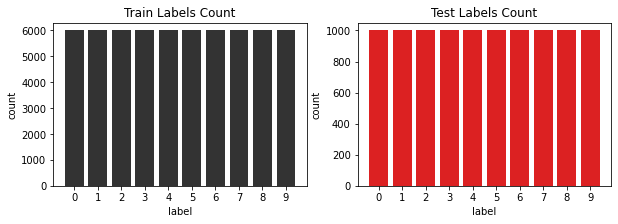

In [12]:
#Label count
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
sns.countplot(train['label'], palette=['#333333' for i in range(10)])
plt.title('Train Labels Count')
plt.plot()

plt.subplot(1, 2, 2)
sns.countplot(test['label'], palette=['#fb0203' for i in range(10)])
plt.title('Test Labels Count')
plt.plot()

In [13]:
#Convert the dataframes into numpy arrays of float32
#Then I can pass them to the tensorflow and keras
train_data = np.array(train, dtype='float32')
test_data = np.array(test, dtype='float32')

#Split the train data into X & Y (X axis - Image Data, Y axis - Labels)
#Rescaling image data
x_train = train_data[:,1:]/255
y_train = train_data[:,0]
x_test = test_data[:,1:]/255
y_test = test_data[:,0]

In [14]:
#View x_train Data
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
#View y_train Data
y_train

array([2., 9., 6., ..., 8., 8., 7.], dtype=float32)

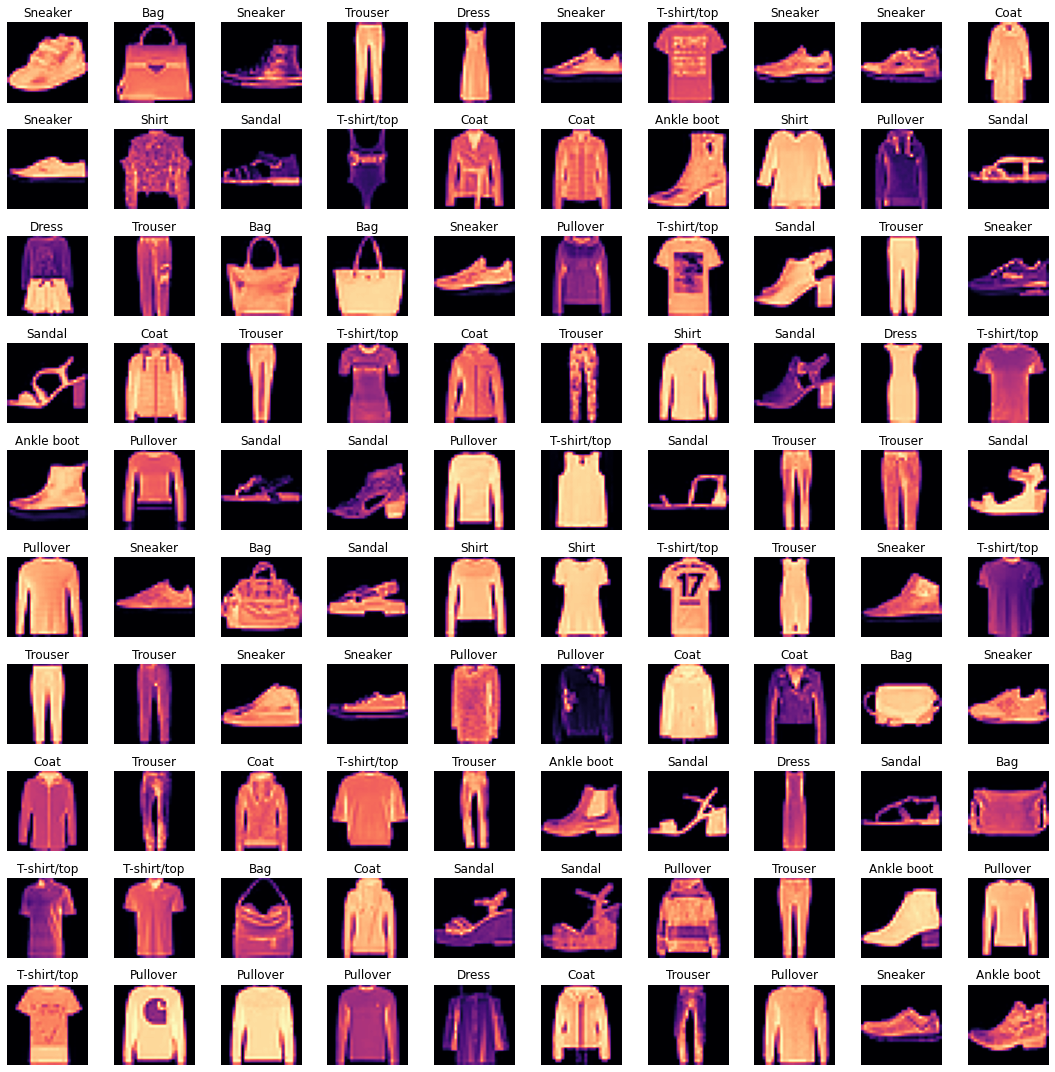

In [18]:
#Data Visualization
#Class Names from Dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#First few train images with labels
columns = 10
rows = 10
fig = plt.figure(figsize=(15, 15))

for i in range(1, columns * rows+1):
    data_idx = np.random.randint(len(x_train))
    img = x_train[data_idx].reshape([28, 28])
    label = labels[y_train[data_idx]]

    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='magma')
    plt.axis('off')
plt.tight_layout()
plt.show()

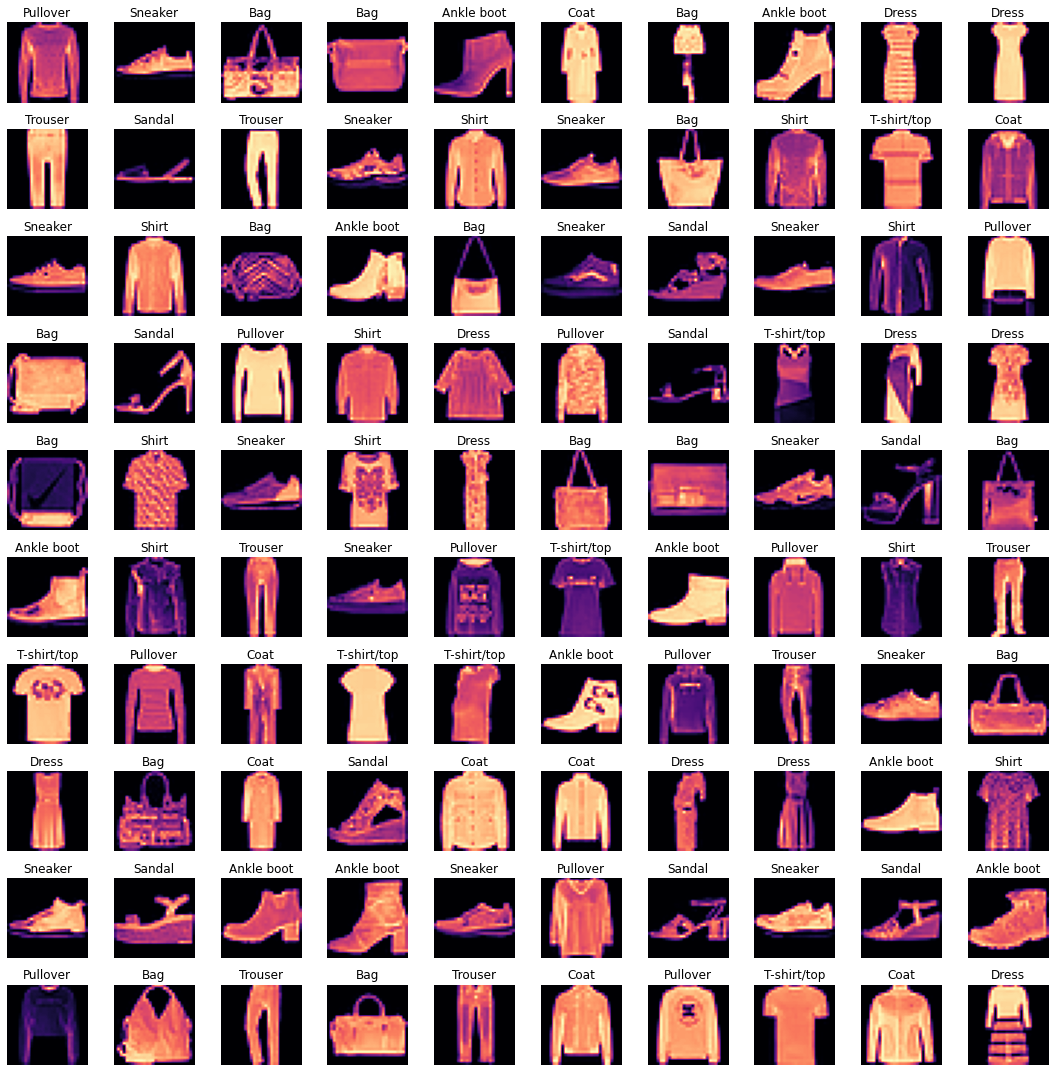

In [19]:
#First few test images with labels
columns = 10
rows = 10
fig = plt.figure(figsize=(15, 15))

for i in range(1, columns * rows+1):
    data_idx = np.random.randint(len(x_test))
    img = x_test[data_idx].reshape([28, 28])
    label = labels[y_test[data_idx]]

    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='magma')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [25]:
#Split into image and labels and convert to numpy array
X_train = train.iloc[:, 1:].to_numpy()
y_train = train['label'].to_numpy()

X_test = test.iloc[:, 1:].to_numpy()
y_test = test['label'].to_numpy()

In [28]:
#Reshaping images
input_size = 784
x_train = x_train.reshape(-1, input_size)
x_test = x_test.reshape(-1, input_size)

In [29]:
#Fix data type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [30]:
#One hot encoding targets
y_train_enc = to_categorical(y_train, num_classes=10)
y_test_enc = to_categorical(y_test, num_classes=10)

In [31]:
#Train validation split
X_train, X_val, y_train_enc, y_val_enc = train_test_split(X_train, y_train_enc, test_size=0.3)

In [42]:
#Model Parameters
INPUT_SHAPE = (28,28,1)
OUTPUT_SHAPE = 10
BATCH_SIZE = 128
EPOCHS = 100
VERBOSE = 2

In [43]:
#Define Model
model = Sequential(name="sequential")

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [44]:
#Model Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
#View Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 50)                270450    
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                        

In [45]:
#Model Fitting
history = model.fit(X_train, y_train_enc, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=VERBOSE, validation_split=0.3)

Epoch 1/100
230/230 - 15s - loss: 3.1366 - accuracy: 0.5796 - val_loss: 0.8329 - val_accuracy: 0.7285 - 15s/epoch - 66ms/step
Epoch 2/100
230/230 - 14s - loss: 0.7570 - accuracy: 0.7183 - val_loss: 0.6620 - val_accuracy: 0.7347 - 14s/epoch - 63ms/step
Epoch 3/100
230/230 - 14s - loss: 0.6241 - accuracy: 0.7495 - val_loss: 0.6043 - val_accuracy: 0.7509 - 14s/epoch - 62ms/step
Epoch 4/100
230/230 - 14s - loss: 0.5676 - accuracy: 0.7616 - val_loss: 0.5882 - val_accuracy: 0.7601 - 14s/epoch - 62ms/step
Epoch 5/100
230/230 - 14s - loss: 0.5168 - accuracy: 0.7841 - val_loss: 0.5284 - val_accuracy: 0.7984 - 14s/epoch - 63ms/step
Epoch 6/100
230/230 - 16s - loss: 0.4768 - accuracy: 0.8079 - val_loss: 0.4974 - val_accuracy: 0.8174 - 16s/epoch - 68ms/step
Epoch 7/100
230/230 - 14s - loss: 0.4185 - accuracy: 0.8371 - val_loss: 0.4634 - val_accuracy: 0.8495 - 14s/epoch - 60ms/step
Epoch 8/100
230/230 - 14s - loss: 0.3574 - accuracy: 0.8678 - val_loss: 0.3938 - val_accuracy: 0.8643 - 14s/epoch - 62

In [48]:
#Model loss and accuracy on validation set
score = model.evaluate(X_test, y_test_enc)
print('Test Loss: {:.2f}%'.format(score[0]*100))
print('Test Accuracy: {:.2f}%'.format(score[1]*100))

313/313 [==============================] - 2s 8ms/step - loss: 0.6341 - accuracy: 0.8966
Test Loss: 63.41%
Test Accuracy: 89.66%


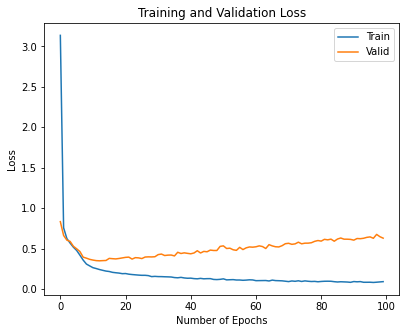

In [49]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Valid')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

# **Autoencoder using the Fashion MNIST Dataset**

In [ ]:
#(b) Start the Autoencorder Procedure
x_train = train[list(train.columns)[1:]].values
x_test = test[list(test.columns)[1:]].values

In [ ]:
#Define variables
input_size = 784

# Normalizing all values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
# Reshaping(Flatten the images into vectors of size 784)
x_train = x_train.reshape(-1, input_size)
x_test = x_test.reshape(-1, input_size)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
#Define variables
layer_2_size = 2400

input_img = Input(shape=(input_size,))

# Encoded representation of the input
encode_layer1 = Dense(2900, activation='relu')(input_img)
encode_layer2 = Dense(layer_2_size, activation='relu')(encode_layer1)
encode_layer3 = Dense(1900, activation='relu')(encode_layer2)

# Latent view
latent_view   = Dense(10, activation='sigmoid')(encode_layer3)

# Dencoded representation of the output
decode_layer1 = Dense(1900, activation='relu')(latent_view)
decode_layer2 = Dense(layer_2_size, activation='relu')(decode_layer1)
decode_layer3 = Dense(2900, activation='relu')(decode_layer2)

# Map input to its reconstruction
output_img  = Dense(input_size)(decode_layer3)

autoencoder = Model(input_img, output_img)

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_17 (Dense)            (None, 2900)              2276500   
                                                                 
 dense_18 (Dense)            (None, 2400)              6962400   
                                                                 
 dense_19 (Dense)            (None, 1900)              4561900   
                                                                 
 dense_20 (Dense)            (None, 10)                19010     
                                                                 
 dense_21 (Dense)            (None, 1900)              20900     
                                                                 
 dense_22 (Dense)            (None, 2400)              456240

In [ ]:
#Using Adam optimizer and Mean squared error loss function
autoencoder.compile(optimizer='adam', loss='mse')

#Train the model
autoencoder.fit(x_train, x_train, epochs=50, batch_size=2048, validation_data=(x_test, x_test))

Epoch 1/50
30/30 [==============================] - 188s 6s/step - loss: 0.0825 - val_loss: 0.0652
Epoch 2/50
30/30 [==============================] - 189s 6s/step - loss: 0.0585 - val_loss: 0.0516
Epoch 3/50
30/30 [==============================] - 181s 6s/step - loss: 0.0429 - val_loss: 0.0380
Epoch 4/50
30/30 [==============================] - 183s 6s/step - loss: 0.0364 - val_loss: 0.0348
Epoch 5/50
30/30 [==============================] - 176s 6s/step - loss: 0.0336 - val_loss: 0.0316
Epoch 6/50
30/30 [==============================] - 180s 6s/step - loss: 0.0305 - val_loss: 0.0284
Epoch 7/50
30/30 [==============================] - 181s 6s/step - loss: 0.0280 - val_loss: 0.0284
Epoch 8/50
30/30 [==============================] - 177s 6s/step - loss: 0.0257 - val_loss: 0.0244
Epoch 9/50
30/30 [==============================] - 178s 6s/step - loss: 0.0237 - val_loss: 0.0232
Epoch 10/50
30/30 [==============================] - 178s 6s/step - loss: 0.0235 - val_loss: 0.0226
Epoch 11/

In [ ]:
reconstructed = autoencoder.predict(x_test)

313/313 [==============================] - 18s 58ms/step


In [ ]:
from PIL import Image 

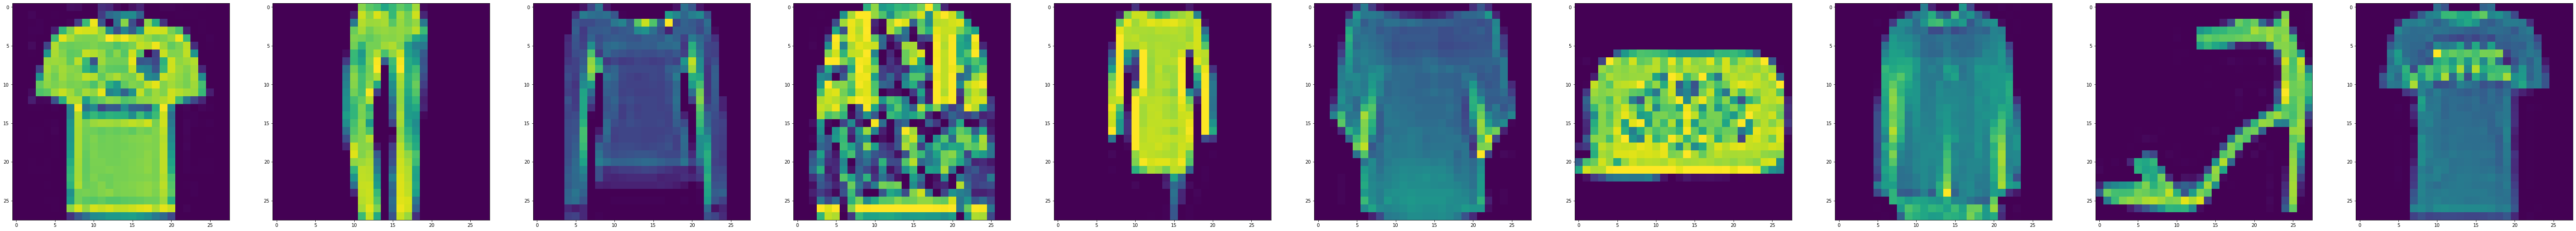

In [ ]:
#Display Original
f, ax = plt.subplots(1,10)
f.set_size_inches(100, 100)
for i in range(10):
    ax[i].imshow(x_test[i].reshape(28, 28))
plt.show()

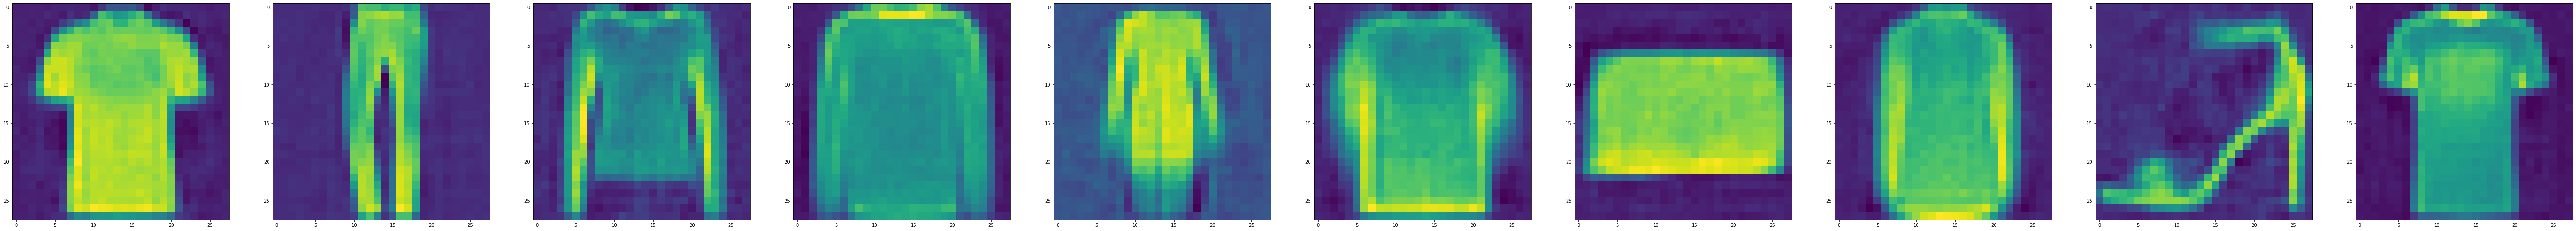

In [ ]:
#Display Reconstructed Images
f, ax = plt.subplots(1,10)
f.set_size_inches(100, 100)
for i in range(10):
    ax[i].imshow(reconstructed[i].reshape(28, 28))
plt.show()